In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../data/weatherAUS.csv')
climate = pd.read_csv('../data/Location_Climate_unique.csv').set_index('Location')['Climate'].to_dict()

# df['climate'] = df['Location'].map(climate)
# df.drop(columns = 'Location')

In [91]:
nan_count_full = df.groupby('Location')[df.columns].apply(lambda x: x.isna().sum())
fig = px.bar(data_frame = nan_count_full, title = 'full nan')
fig.show()

In [92]:
print(((df[df['Location'] == 'Newcastle'].isna().sum()) / len(df[df['Location'] == 'Newcastle'])*100).round(2))
print(df[df['Location'] == 'Newcastle'].shape)
print(3000*23)

Date               0.00
Location           0.00
MinTemp           11.39
MaxTemp            7.73
Rainfall           2.76
WindGustDir      100.00
WindGustSpeed    100.00
WindDir9am        46.76
WindDir3pm        43.40
WindSpeed9am       8.39
WindSpeed3pm      31.23
Humidity9am        7.86
Humidity3pm       30.87
Pressure9am      100.00
Pressure3pm      100.00
Temp9am            7.70
Temp3pm           30.67
RainToday          2.76
RainTomorrow       2.76
dtype: float64
(3039, 19)
69000


In [93]:
nan_count = df.groupby('Location')['WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm'].apply(lambda x: (x.isna().sum()))
fig = px.bar(data_frame = nan_count, title = 'Wind graph missing value')
fig.show()

# nan_count.head()

/tmp/ipykernel_3892/2489093598.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



on peut commencer par mettre les colonnes nan avec les colonnes non manquantes de la ville à côté

# etude de WindGustSpeed

In [113]:
wind_col = ['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']

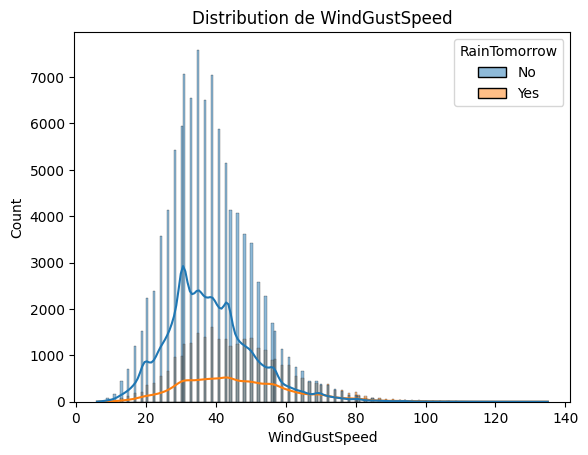

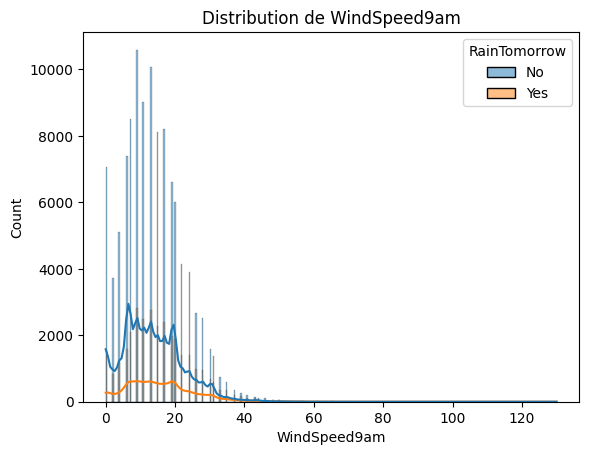

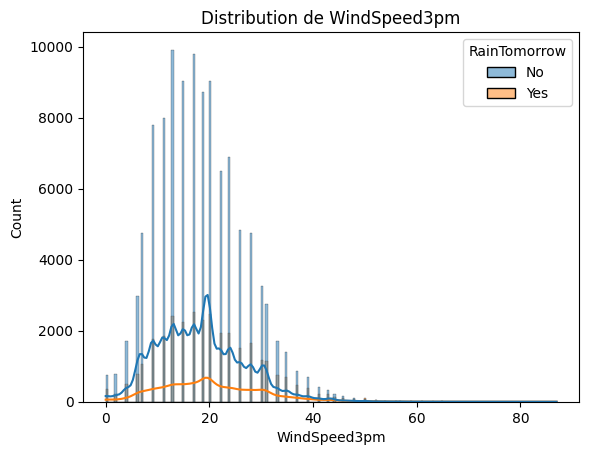

In [114]:
for i in wind_col:
    sns.histplot(data=df, x=i, hue='RainTomorrow', kde = True)
    plt.title(f"Distribution de {i}")
    plt.show()

In [ ]:
for i in wind_col:
    fig = px.box(data_frame = df, x = i, color = 'RainTomorrow', title = i)
    fig.show()

In [5]:
df = pd.read_csv('../data/weatherAUS.csv')
df['climate'] = df['Location'].map(climate)
df = df.dropna(subset = 'RainTomorrow')
print(df['RainTomorrow'].isna().sum())

print('isna.sum de WindGustSpeed avant preproc ---->', df['WindGustSpeed'].isna().sum())

def preproc_windgustspeed(df):

    # on récupère les mdeian en fonction de la Location et de RainTomorrow
    dict_wgs = {}

    for i in df['climate'].unique():
        for j in df['RainTomorrow'].unique():
            # print(i, j)
            med = (df[(df['climate'] == i) & (df['RainTomorrow'] == j)]['WindGustSpeed'].median())
            dict_wgs[i, j] = med
    # print(dict_wgs)

    for index, i in df['WindGustSpeed'].items():
        if pd.isna(i):
            df.loc[index, 'WindGustSpeed']  = dict_wgs[df.loc[index, 'climate'], df.loc[index, 'RainTomorrow']]
            # print(dict_wgs[df.loc[index, 'Location'], df.loc[index, 'RainTomorrow']])

            # print('la médiane', dict_wgs[df.loc[index, 'Location'], df.loc[index, 'RainTomorrow']])

    return df


preproc_windgustspeed(df)
print('isna.sum de WindGustSpeed après preproc ---->', df['WindGustSpeed'].isna().sum())


0
isna.sum de WindGustSpeed avant preproc ----> 9270
{('Temperate', 'No'): 37.0, ('Temperate', 'Yes'): 44.0, ('Grassland', 'No'): 37.0, ('Grassland', 'Yes'): 43.0, ('Subtropical', 'No'): 37.0, ('Subtropical', 'Yes'): 43.0, ('Tropical', 'No'): 37.0, ('Tropical', 'Yes'): 41.0, ('Desert', 'No'): 41.0, ('Desert', 'Yes'): 50.0}
isna.sum de WindGustSpeed après preproc ----> 0


# Etude de la variable WindSpeed9am